# BA820 Project Proposal: Mapping the Economic Burden of Childcare Across US Counties

**Project Title**: Mapping the Economic Burden of Childcare Across US Counties

**Section and Team Number**: B1 Team 9

**Members**: Kara Liao, Li-Hsin Chang, Mokhinur Talibzhanova, Nathan Dai-Yin Leung


## Environment Setup

In [ ]:
from google.colab import data_table
from google.colab import drive
import pandas as pd

# Enable the interactive table feature
data_table.enable_dataframe_formatter()

# Access Google Drive
drive.mount('/content/drive')

# Read the CSV from your Drive
df = pd.read_csv("/content/drive/MyDrive/2026 Spring/unsupervised/project/childcare_costs.csv")

df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,county_fips_code,study_year,unr_16,funr_16,munr_16,unr_20to64,funr_20to64,munr_20to64,flfpr_20to64,flfpr_20to64_under6,...,memp_p,femp_p,mcsa,mfccsa,mc_infant,mc_toddler,mc_preschool,mfcc_infant,mfcc_toddler,mfcc_preschool
0,1001,2008,5.42,4.41,6.32,4.6,3.5,5.6,68.9,66.9,...,21.55,4.07,80.92,81.40,104.95,104.95,85.92,83.45,83.45,81.40
1,1001,2009,5.93,5.72,6.11,4.8,4.6,5.0,70.8,63.7,...,21.96,5.19,83.42,85.68,105.11,105.11,87.59,87.39,87.39,85.68
2,1001,2010,6.21,5.57,6.78,5.1,4.6,5.6,71.3,67.0,...,21.28,4.13,85.92,89.96,105.28,105.28,89.26,91.33,91.33,89.96
3,1001,2011,7.55,8.13,7.03,6.2,6.3,6.1,70.2,66.5,...,22.80,4.77,88.43,94.25,105.45,105.45,90.93,95.28,95.28,94.25
4,1001,2012,8.60,8.88,8.29,6.7,6.4,7.0,70.6,67.1,...,22.88,4.84,90.93,98.53,105.61,105.61,92.60,99.22,99.22,98.53


In [ ]:
df.columns

Index(['county_fips_code', 'study_year', 'unr_16', 'funr_16', 'munr_16',
       'unr_20to64', 'funr_20to64', 'munr_20to64', 'flfpr_20to64',
       'flfpr_20to64_under6', 'flfpr_20to64_6to17',
       'flfpr_20to64_under6_6to17', 'mlfpr_20to64', 'pr_f', 'pr_p', 'mhi_2018',
       'me_2018', 'fme_2018', 'mme_2018', 'total_pop', 'one_race',
       'one_race_w', 'one_race_b', 'one_race_i', 'one_race_a', 'one_race_h',
       'one_race_other', 'two_races', 'hispanic', 'households',
       'h_under6_both_work', 'h_under6_f_work', 'h_under6_m_work',
       'h_under6_single_m', 'h_6to17_both_work', 'h_6to17_fwork',
       'h_6to17_mwork', 'h_6to17_single_m', 'emp_m', 'memp_m', 'femp_m',
       'emp_service', 'memp_service', 'femp_service', 'emp_sales',
       'memp_sales', 'femp_sales', 'emp_n', 'memp_n', 'femp_n', 'emp_p',
       'memp_p', 'femp_p', 'mcsa', 'mfccsa', 'mc_infant', 'mc_toddler',
       'mc_preschool', 'mfcc_infant', 'mfcc_toddler', 'mfcc_preschool'],
      dtype='object')

In [ ]:
childcare = df.copy()

In [ ]:
childcare = childcare[
    (childcare["mc_infant"] > 0) &
    (childcare["mhi_2018"] > 0)
]

In [ ]:
childcare.shape
childcare[["mc_infant","mhi_2018"]].describe()

,mc_infant,mhi_2018
count,23593.000000,23593.000000
mean,146.051770,50631.312692
std,53.698566,13407.444469
min,27.730000,19841.920000
25%,108.750000,41998.000000
50%,134.500000,48634.920000
75%,166.330000,56421.300000
max,470.000000,136268.000000


In [ ]:
childcare.isna().sum().sort_values(ascending=False)

,0
mfccsa,251
mfcc_infant,251
mfcc_toddler,251
mfcc_preschool,251
county_fips_code,0
...,...
femp_n,0
mc_toddler,0
mc_infant,0
mcsa,0


In [ ]:
childcare_clean = childcare.dropna(
    subset=["mfcc_infant", "mfcc_toddler", "mfcc_preschool"]
)

In [ ]:
childcare_clean.isna().sum().sort_values(ascending=False)

,0
county_fips_code,0
study_year,0
unr_16,0
funr_16,0
munr_16,0
...,...
mc_toddler,0
mc_preschool,0
mfcc_infant,0
mfcc_toddler,0


In [ ]:
childcare_clean.duplicated(
    subset=["county_fips_code","study_year"]
).sum()

np.int64(0)

In [ ]:
childcare_clean.dtypes

,0
county_fips_code,int64
study_year,int64
unr_16,float64
funr_16,float64
munr_16,float64
...,...
mc_toddler,float64
mc_preschool,float64
mfcc_infant,float64
mfcc_toddler,float64


In [ ]:
childcare_clean["mc_infant"].describe()
childcare_clean["mhi_2018"].describe()

,mhi_2018
count,23342.000000
mean,50428.437534
std,13158.072756
min,19841.920000
25%,41946.270000
50%,48541.050000
75%,56204.135000
max,136268.000000


In [ ]:
childcare_clean

,county_fips_code,study_year,unr_16,funr_16,munr_16,unr_20to64,funr_20to64,munr_20to64,flfpr_20to64,flfpr_20to64_under6,...,memp_p,femp_p,mcsa,mfccsa,mc_infant,mc_toddler,mc_preschool,mfcc_infant,mfcc_toddler,mfcc_preschool
0,1001,2008,5.42,4.41,6.32,4.6,3.5,5.6,68.9,66.9,...,21.55,4.07,80.92,81.40,104.95,104.95,85.92,83.45,83.45,81.40
1,1001,2009,5.93,5.72,6.11,4.8,4.6,5.0,70.8,63.7,...,21.96,5.19,83.42,85.68,105.11,105.11,87.59,87.39,87.39,85.68
2,1001,2010,6.21,5.57,6.78,5.1,4.6,5.6,71.3,67.0,...,21.28,4.13,85.92,89.96,105.28,105.28,89.26,91.33,91.33,89.96
3,1001,2011,7.55,8.13,7.03,6.2,6.3,6.1,70.2,66.5,...,22.80,4.77,88.43,94.25,105.45,105.45,90.93,95.28,95.28,94.25
4,1001,2012,8.60,8.88,8.29,6.7,6.4,7.0,70.6,67.1,...,22.88,4.84,90.93,98.53,105.61,105.61,92.60,99.22,99.22,98.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34562,56045,2014,3.60,5.36,2.28,2.4,4.8,0.6,75.9,74.8,...,23.55,6.13,91.14,112.94,147.36,120.38,123.99,110.71,110.71,111.47
34563,56045,2015,5.16,7.86,3.16,4.2,7.6,1.6,73.2,82.0,...,27.26,6.36,94.76,110.89,140.36,118.77,118.77,110.89,110.89,110.89
34564,56045,2016,3.61,4.67,2.79,3.4,4.5,2.6,69.7,68.1,...,24.55,6.72,98.38,108.85,133.37,117.16,113.55,114.10,111.07,110.31
34565,56045,2017,2.24,2.64,1.95,2.3,2.8,2.0,71.4,63.6,...,30.26,4.23,102.01,106.81,126.38,115.55,108.32,117.30,111.26,109.74


## Preliminary EDA Observations:

# How do childcare costs differ across income groups at similar levels of working-parent households?

/tmp/ipython-input-1127197952.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  childcare_clean["pct_both_work"] = (
/tmp/ipython-input-1127197952.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  childcare_clean["income_group"] = pd.cut(


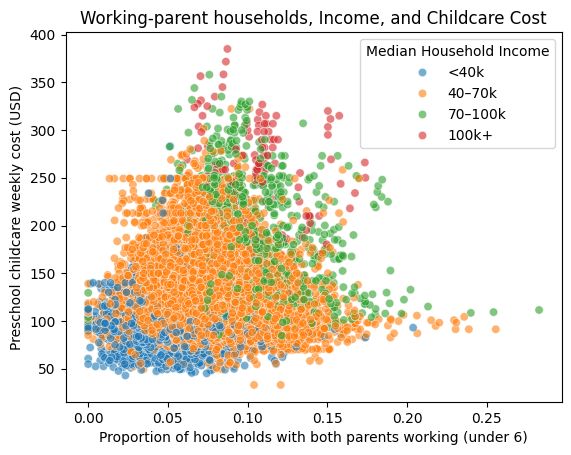

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

childcare_clean["pct_both_work"] = (
    childcare_clean["h_under6_both_work"] / childcare["households"]
)

childcare_clean["income_group"] = pd.cut(
    childcare_clean["mhi_2018"],
    bins=[0, 40000, 70000, 100000, 200000],
    labels=["<40k", "40–70k", "70–100k", "100k+"]
)

sns.scatterplot(
    data=childcare_clean,
    x="pct_both_work",
    y="mc_preschool",
    hue="income_group",
    alpha=0.6
)
plt.xlabel("Proportion of households with both parents working (under 6)")
plt.ylabel("Preschool childcare weekly cost (USD)")
plt.title("Working-parent households, Income, and Childcare Cost")
plt.legend(title="Median Household Income")
plt.show()

### Do counties with higher professionalization show a wider spread and more extreme childcare costs?

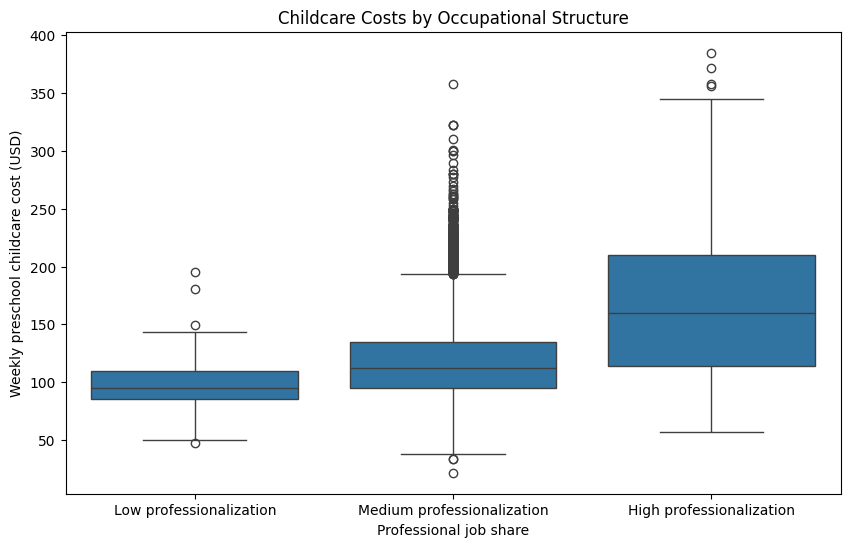

In [ ]:
childcare["job_group"] = pd.cut(
    childcare["emp_m"],
    bins=[0, 20, 40, 100],
    labels=["Low professionalization", "Medium professionalization", "High professionalization"]
)
plt.figure(figsize=(10, 6))

sns.boxplot(
    data=childcare,
    x="job_group",
    y="mc_preschool"
)


plt.xlabel("Professional job share")
plt.ylabel("Weekly preschool childcare cost (USD)")
plt.title("Childcare Costs by Occupational Structure")
plt.show()


### What patterns and variations exist in childcare costs across different regions and demographic characteristics?

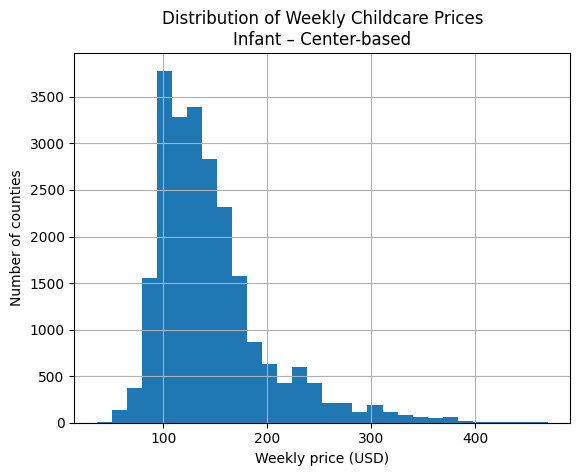

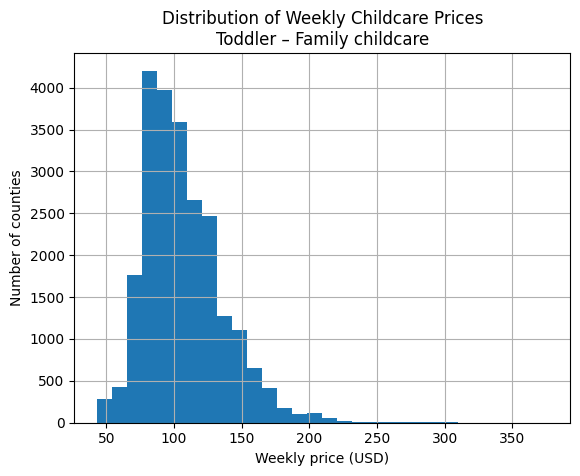

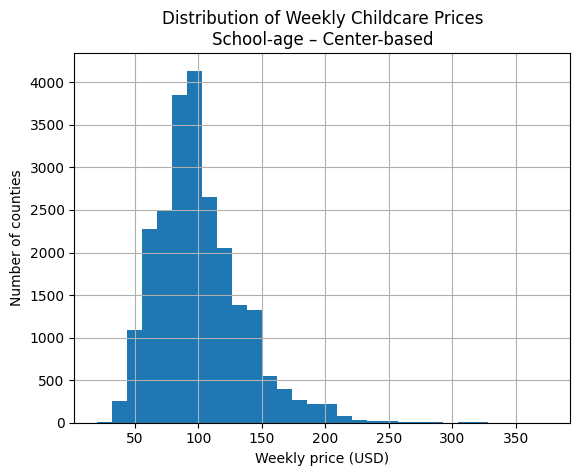

In [ ]:
price_cols = {
    "Infant – Center-based": "mc_infant",
    "Toddler – Family childcare": "mfcc_toddler",
    "School-age – Center-based": "mcsa"
}

for title, col in price_cols.items():
    plt.figure()
    childcare_clean[col].hist(bins=30)
    plt.title(f"Distribution of Weekly Childcare Prices\n{title}")
    plt.xlabel("Weekly price (USD)")
    plt.ylabel("Number of counties")
    plt.show()

How do weekly childcare costs differ across child age groups and care types, and which combinations are associated with the highest and lowest costs?

/tmp/ipython-input-3902050912.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, showfliers=True)


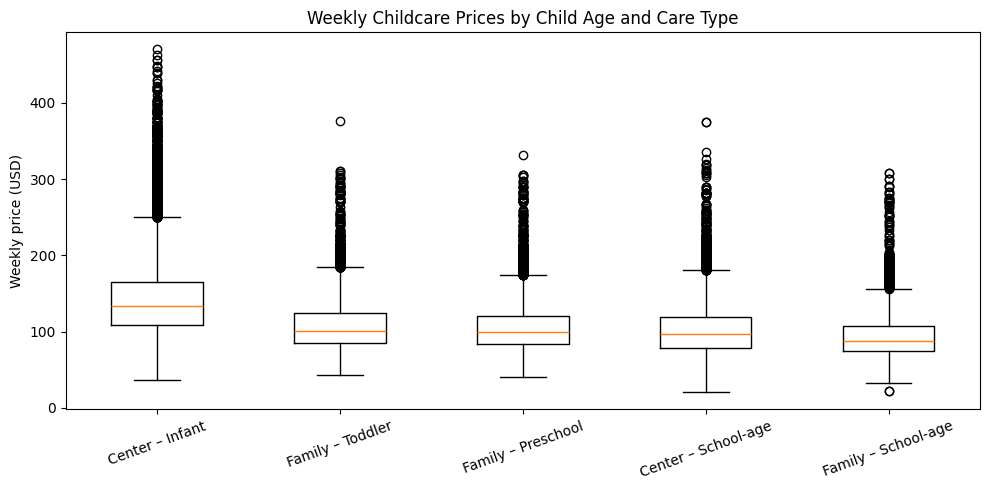

In [ ]:
price_map = {
    "mc_infant": "Center – Infant",
    "mfcc_toddler": "Family – Toddler",
    "mfcc_preschool": "Family – Preschool",
    "mcsa": "Center – School-age",
    "mfccsa": "Family – School-age"
}

price_map = {k: v for k, v in price_map.items() if k in childcare_clean.columns}

data = [childcare_clean[col] for col in price_map.keys()]
labels = list(price_map.values())

plt.figure(figsize=(10, 5))
plt.boxplot(data, labels=labels, showfliers=True)
plt.ylabel("Weekly price (USD)")
plt.title("Weekly Childcare Prices by Child Age and Care Type")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()